## K-Nearest Neighbors

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [5]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

The basic idea is to cluster our training data and then the predicition is done by plotting the data point and then comparing the $K$ nearest neighbours in that point. There are different metrics to do that. We use Euclidean distance here. And these data points are compared to estimate towards which category is our data point closer to, and then the data point is classified accordingly.

<a id='preprocessing'></a>
### Pre processing

In [6]:
## importing the libraries for preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
datset = pd.read_csv('Social_Network_Ads.csv')

In [8]:
x = datset.iloc[:, 2:4].values
y = datset.iloc[:, 4].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [10]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/home/nevin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


<a id='building'></a>
### Building the model.
Training the model using Simple Linear Regression

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

##### [KNeighborsClassifier]()

- n_neighbors : Number of neighbors.
- metric : The type of metric used.
- P : Power parameter, When P=2 Its equalent of using euclidean distance.

In [12]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p =2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = classifier.predict(x_test)

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

<a id='result'></a>
### Result

In [23]:
def plot_regions(x, y, title):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

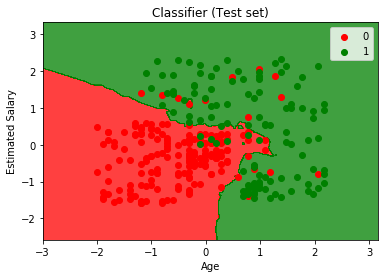

In [24]:
plot_regions(x_train, y_train, 'Classifier (Test set)')

As we can see, the classification is non linear compared to logistic regression. What we get is a region more accurate than the logistic regression, this is also clear from the confusion matrix that we derived. 